# Домашняя работа «Проблема качества данных»

### **Задание**

#### **Цель:** применить на практике методы по оценке качества данных.

### Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберите и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.<br>
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.<br>b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.<br>
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.<br>
a) Кратко опишите какие преобразования были сделаны и почему.<br>
b) Сравните метрики моделей из п. 2 и п. 10.<br>
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.<br> *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

**Результат:**
1. Применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). 
2. Проведена оценка качества данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, recall_score, precision_score, accuracy_score

#### 1. Получите и загрузите данные.

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберите и посчитайте метрику качества.
IG comments: Можно было бы удалить и порядковый номер, поскольку он уникальный/возрастающий и будет вносить лишнюю помеху, но следую строго заданию).

In [6]:
del data['Name'], data['Sex'], data['Ticket'], data['Cabin'], data['Embarked']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [8]:
data = data[data.Age.notnull()]

In [9]:
y = pd.Series(data = data.Survived)

In [10]:
del data['Survived']

In [11]:
X = data

In [12]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000)
)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [14]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [15]:
model.predict_proba(X_test)[:10]

array([[0.87602611, 0.12397389],
       [0.62946732, 0.37053268],
       [0.25839012, 0.74160988],
       [0.87261239, 0.12738761],
       [0.69864557, 0.30135443],
       [0.40926354, 0.59073646],
       [0.35643636, 0.64356364],
       [0.95088101, 0.04911899],
       [0.61023252, 0.38976748],
       [0.27866615, 0.72133385]])

In [16]:
model.score(X_train, y_train)

0.7040280210157618

In [17]:
model.score(X_test, y_test)

0.6713286713286714

In [18]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")

Precision = 0.5849
Recall = 0.5536


#### Вывод: Хотя метрика точности сравнительно высокая, показатели precision and recall неудовлетворительные.

#### 3. Снова загрузите полные данные.

In [19]:
data = pd.read_csv("train.csv")

#### 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Удаляем признаки: 
1. PassengerID (уникальны в порядке возрастания).
2. Name (все отличаются и вряд ли от имени зависит кто выжил, а кто нет).
3. Embarked (можно предположить, что от порта посадки не зависит выживаемость).<br>
Дополнительно (для уверенности) посмотрим на корреляцию между этими признаками, предварительно, преобразовав их в числа, где необходимо.

In [21]:
data.Name.nunique()

891

In [22]:
data[['Survived','PassengerId']].corr(method = 'pearson') # аналогичный результат будет для Name, если имена пронумеровать уникально

,Survived,PassengerId
Survived,1.000000,-0.005007
PassengerId,-0.005007,1.000000


##### Для проверки на корреляцию заменим строковые значения на целочисленные

In [23]:
data.Embarked.replace({'S':1,'C':2,'Q':3}, inplace=True)
data.Embarked.fillna(4, inplace=True)

In [24]:
data.Embarked.unique()

array([1., 2., 3., 4.])

In [25]:
data[['Survived','Embarked']].corr(method = 'pearson')

,Survived,Embarked
Survived,1.000000,0.118026
Embarked,0.118026,1.000000


##### Как видим корреляция отсутствует или крайне незначительная, поэтому удаляем.

In [26]:
del data['PassengerId'], data['Name'], data['Embarked']

#### 5. Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.<br>
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


##### В целом, если удалить все строки, где есть нулевые значения, то останется всего 22.9% строк от всех данных, то есть нулевые значения присутствуют в 77.1% строк

In [28]:
data_test = data
for i in ['Age','Cabin']:
    data_test=data[~(data[i].isna())]
print(f"Data Loss % if rows with null values are removed = {round((1-data_test.shape[0]/data.shape[0])*100,1)}")

Data Loss % if rows with null values are removed = 77.1


##### Максимальное количество строк с нулевыми данными вносит признак Cabin, то его тоже удалим, поскольку число нулевых значений 687 против всех 891 и не ясно как заполнить пустые ячейки. В противном случае неправильное заполнение такого большого количества или удаление может сильно повлиять на конечный результат.

In [29]:
del data['Cabin']

##### Количество пропущенных значений для Age достаточно велико и равно почти 20% (177/891 = 0.1986...). В идеале стоит попробовать посмотреть на результат моделирования без Age и с Age с заполненными пустыми ячейками. В нашем случае выберем заполнение. Прежде чем принять решение относительно как заполнить пустые ячейки для возраста посмотрим распределение и разные статистические средние по возрасту.

In [30]:
print(f"Age Mean = {data.Age.mean()},\nAge Mode = {data.Age.mode()},\nAge Median = {data.Age.median()}")

Age Mean = 29.69911764705882,
Age Mode = 0    24.0
Name: Age, dtype: float64,
Age Median = 28.0


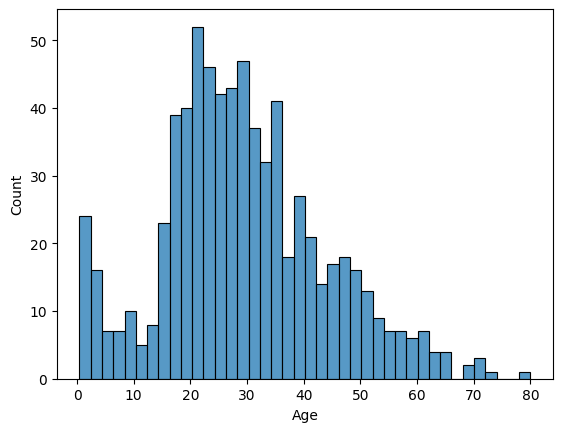

In [31]:
sns.histplot(data = data, x = 'Age', bins = 40)
plt.show()

##### Выбираем значение медианы для заполнения

In [32]:
data.Age.fillna(28, inplace=True)

##### И добавим ещё колонку с новым признаком, который принимает значения Child, Adult, Senior, поскольку в любой опасной ситуации старались спасать детей.

In [33]:
def func_age(age):
    if age<=14:
        value='Child'
    elif age<=45:
        value='Adult'
    else:
        value='Senior'
    return value

In [34]:
data['Age_int'] = data.apply(lambda x: func_age(x['Age']), axis=1) # the column is added

##### Надо определиться, что делать с признаком Ticket

In [35]:
data.Ticket.nunique()

681

##### То есть присутствуют дублирующие билеты. Удалим эту колонку тоже, поскольку мы не знаем с чем это связано: ошибки при продаже или что-то другое.

In [36]:
del data['Ticket']

In [37]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_int
0,0,3,male,22.0,1,0,7.2500,Adult
1,1,1,female,38.0,1,0,71.2833,Adult
2,1,3,female,26.0,0,0,7.9250,Adult
3,1,1,female,35.0,1,0,53.1000,Adult
4,0,3,male,35.0,0,0,8.0500,Adult
5,0,3,male,28.0,0,0,8.4583,Adult
6,0,1,male,54.0,0,0,51.8625,Senior
7,0,3,male,2.0,3,1,21.0750,Child
8,1,3,female,27.0,0,2,11.1333,Adult
9,1,2,female,14.0,1,0,30.0708,Child


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Age_int   891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### 6. Категориальные переменные переведите в цифровые значения. 

In [39]:
selected_columns = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Age_int']]
nominal_attributes = ['Sex', 'Age_int']
X = pd.get_dummies(selected_columns, columns=nominal_attributes, drop_first=True, dtype = int)

#### 7. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [40]:
X.Pclass.unique()

array([3, 1, 2], dtype=int64)

##### Существенно отличаться могут только указанные на графике признаки, поскольку остальные принимают значения или 0 или 1 или ограниченное количество значений, как для Pclass

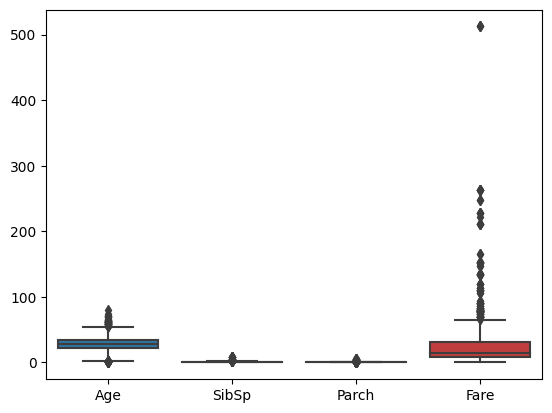

In [41]:
sns.boxplot(X[['Age', 'SibSp','Parch','Fare']])
plt.show()

##### Хотя для Fare присутствуют значительные выбросы, осмелюсь ничего не удалять, поскольку на корабле могут быть очень дорогие каюты. Для Age тоже присутствуют выбросы, но это нормально, поскольку на корабле могут быть и очень пожилые пассажиры.

#### 8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
#### 9. *Попробуйте математически преобразовать признак Age.

##### Выше построены 2 графика и математически признак Age преобразован к Age_int.

In [42]:
data.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_int
Survived,,,,,,,
0,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342


In [43]:
y = pd.Series(data = X.Survived)

In [44]:
len(y)

891

In [45]:
del X['Survived']

In [46]:
X.shape

(891, 8)

In [47]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000)
)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [49]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [50]:
model.predict_proba(X_test)[:10]

array([[0.20243416, 0.79756584],
       [0.07180879, 0.92819121],
       [0.90226988, 0.09773012],
       [0.11223655, 0.88776345],
       [0.91015223, 0.08984777],
       [0.90601933, 0.09398067],
       [0.44408888, 0.55591112],
       [0.89456301, 0.10543699],
       [0.90236037, 0.09763963],
       [0.90235283, 0.09764717]])

In [51]:
model.score(X_train, y_train)

0.8117977528089888

In [52]:
model.score(X_test, y_test)

0.8100558659217877

In [53]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")

Precision = 0.8136
Recall = 0.6761


#### 10. Выводы:
а) Результаты значительно улучшились. Значительно улучшилась метрика accuracy до 0.81 с 0.67 на тестовой выборке. Также значительно улушилась способность модели отличать определённый класс от других классов (матрика Precision) c 0.58 до 0.81. Recall также вырос до 0.6761.<br>
б) Во время подготовки модели были удалены признаки: 
PassangerId, Embarked, Name, Ticket.<br>
в) Отсутствующие значения для Age были заполнены значением медианы и добавлена колонка с новым признаком классов возрастов.<br>
Предполагаю, что для действительно больших наборов данных тоже необходимо делать подобные преобразования, но, возможно, в меньшем размере, в зависимости от процента отсутствующих данных.